In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df_train = pd.read_csv("../input/healthcare-dataset-stroke-data/train_2v.csv")
df_test = pd.read_csv("../input/healthcare-dataset-stroke-data/test_2v.csv")

In [4]:
df_train.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.00,0,0,No,children,Rural,95.12,18.00,NaN,0
1,30468,Male,58.00,1,0,Yes,Private,Urban,87.96,39.20,never smoked,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
def findMissingValue(df):
    for fn in df.columns:
        targetNum = len(df)
        x= df[fn].describe()[0]
        if x !=targetNum:
            missingValue = targetNum-x
            percentOfMV = round(float((missingValue/targetNum)*100),2)
            print(fn + ' has missing value = '+str(missingValue)+' ('+str(percentOfMV)+'%)')
        else:
            print(fn+ ' = No Missing Value')

In [7]:
findMissingValue(df_train)

id = No Missing Value
gender = No Missing Value
age = No Missing Value
hypertension = No Missing Value
heart_disease = No Missing Value
ever_married = No Missing Value
work_type = No Missing Value
Residence_type = No Missing Value
avg_glucose_level = No Missing Value
bmi has missing value = 1462.0 (3.37%)
smoking_status has missing value = 13292 (30.63%)
stroke = No Missing Value


In [8]:
findMissingValue(df_test)

id = No Missing Value
gender = No Missing Value
age = No Missing Value
hypertension = No Missing Value
heart_disease = No Missing Value
ever_married = No Missing Value
work_type = No Missing Value
Residence_type = No Missing Value
avg_glucose_level = No Missing Value
bmi has missing value = 591.0 (3.18%)
smoking_status has missing value = 5751 (30.92%)


**Dealing With Missing Values:**

In [9]:
df_train[df_train['smoking_status'].isna()].count()[0]

13292

In [10]:
df_test[df_test['smoking_status'].isna()].count()[0]

5751

In [11]:
df_train[df_train['smoking_status'].isna()]['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Govt_job', 'Self-employed'],
      dtype=object)

In [12]:
df_train[df_train['smoking_status'].isna()].groupby('work_type')['stroke'].count().iplot(kind='bar')

In [13]:
df_train[df_train['smoking_status'].notna()].groupby('work_type')['stroke'].count().iplot(kind='bar')

**Since 30% value is missing, I am considering the that portion as unknown under 'smoking_status' column**

In [14]:
df_train['smoking_status'].fillna(value='unknown',inplace=True)
df_test['smoking_status'].fillna(value='unknown',inplace=True)

**Since 'bmi' column has missing value of 3.18%, I am droping those value as we don't know requered parameter to calculate bmi and I also don't want to consider mean/meadian/mode here. And also, as the missing value is below 5%, I considered droping them.**

In [15]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [16]:
findMissingValue(df_train)

id = No Missing Value
gender = No Missing Value
age = No Missing Value
hypertension = No Missing Value
heart_disease = No Missing Value
ever_married = No Missing Value
work_type = No Missing Value
Residence_type = No Missing Value
avg_glucose_level = No Missing Value
bmi = No Missing Value
smoking_status = No Missing Value
stroke = No Missing Value


In [17]:
findMissingValue(df_test)

id = No Missing Value
gender = No Missing Value
age = No Missing Value
hypertension = No Missing Value
heart_disease = No Missing Value
ever_married = No Missing Value
work_type = No Missing Value
Residence_type = No Missing Value
avg_glucose_level = No Missing Value
bmi = No Missing Value
smoking_status = No Missing Value


# Exploratory Data Analysis:

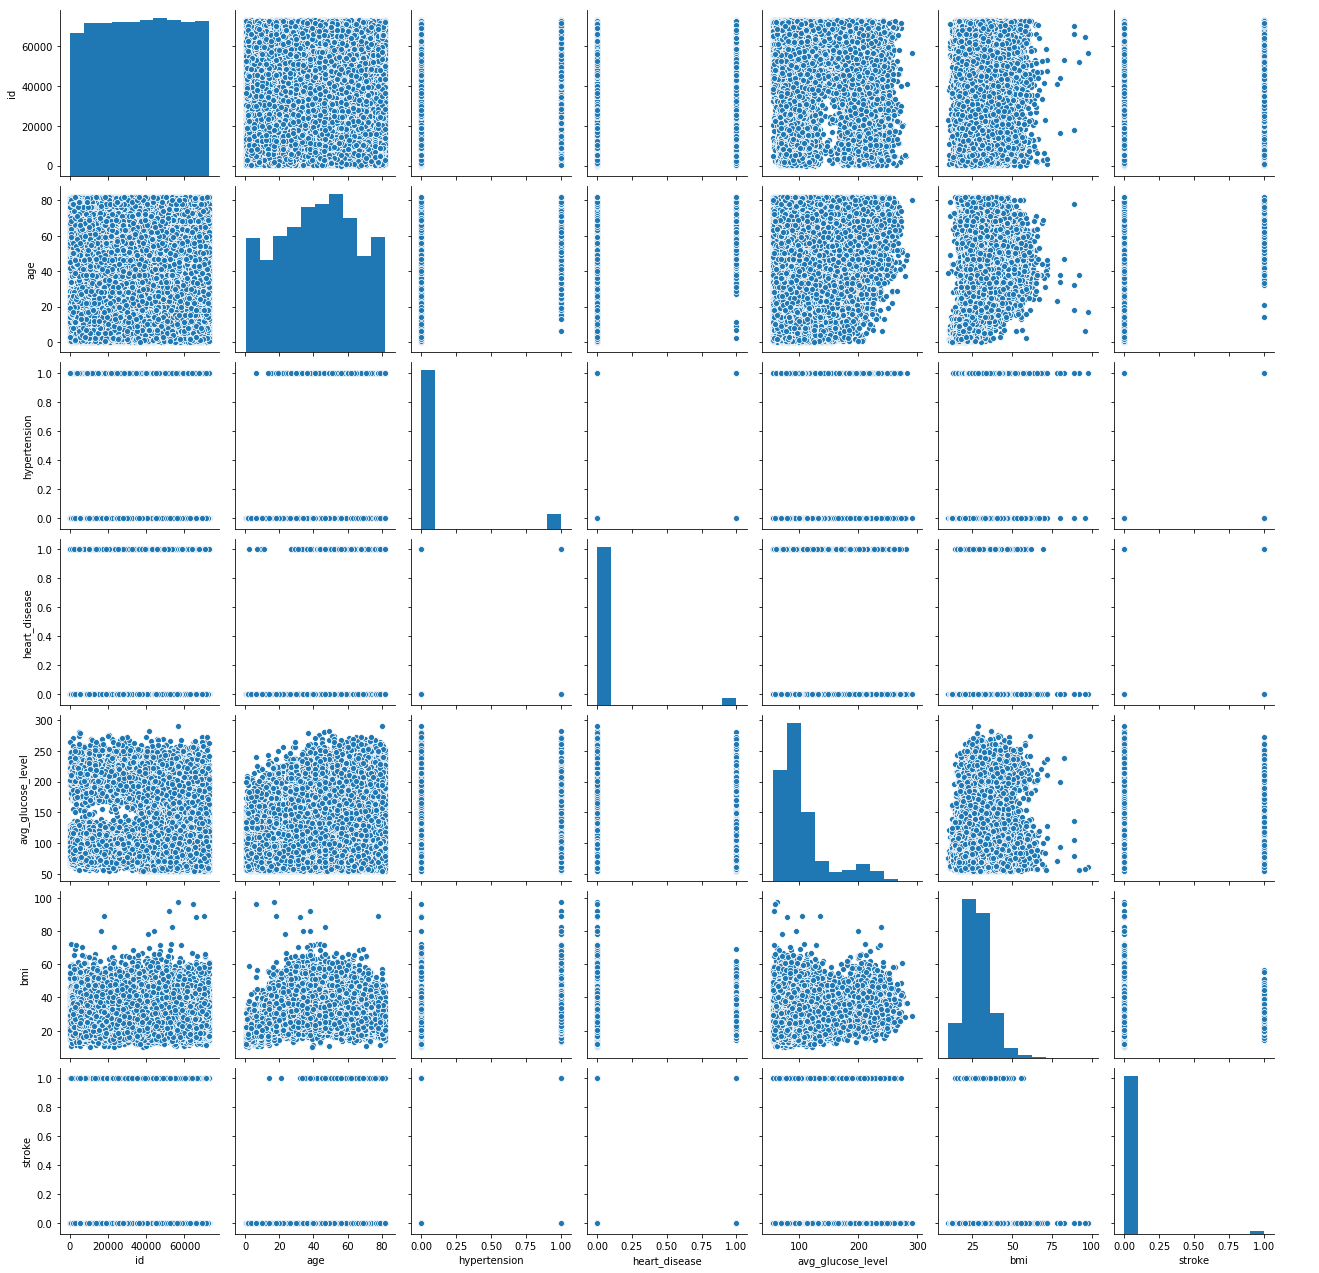

In [18]:
sns.pairplot(df_train)

In [19]:
df_train[df_train['stroke']==1]['gender'].iplot(kind='hist')

In [20]:
df_train['stroke'].value_counts().iplot(kind='bar')

In [21]:
minor = df_train[df_train['age']<=18]
young = df_train[(df_train['age']>=19) & (df_train['age']<=40)]
middle = df_train[(df_train['age']>=41) & (df_train['age']<=60)]
elderly = df_train[df_train['age']>=61]

In [22]:
import plotly.graph_objects as go

labels = ['minor','young','middle','elderly']
values = [(len(minor)/41938)*100,(len(young)/41938)*100,(len(middle)/41938)*100,(len(elderly)/41938)*100]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [23]:
minor_stroke = df_train[(df_train['age']<=18) & (df_train['stroke']==1)]
young_stroke = df_train[(df_train['age']>=19) & (df_train['age']<=40) & (df_train['stroke']==1)]
middle_stroke = df_train[(df_train['age']>=41) & (df_train['age']<=60) & (df_train['stroke']==1)]
elderly_stroke = df_train[(df_train['age']>=61) & (df_train['stroke']==1)]

In [24]:
import plotly.graph_objects as go

labels = ['minor','young','middle','elderly']
values = [(len(minor_stroke)/643)*100,(len(young_stroke)/643)*100,(len(middle_stroke)/643)*100,(len(elderly_stroke)/643)*100]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

# Predictive Analysis

In [25]:
df = pd.get_dummies(df_train)

In [26]:
df=df.drop('id',axis=1)

In [27]:
df2 = pd.get_dummies(df_test)

In [28]:
df2=df2.drop('id',axis=1)

In [29]:
X= df.drop(['stroke'],axis=1)
y= df['stroke']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression


bbc_lr = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=1)

y_train = df['stroke']
X_train = df.drop(['stroke'], axis=1, inplace=False)


bbc_lr.fit(X_train, y_train)


prediction = bbc_lr.predict(X_test)

bbc_lr.score(X_test,y_test)
print('The Logistic Regression Accuracy is {:.2f} %'.format(bbc_lr.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

Using TensorFlow backend.


The Logistic Regression Accuracy is 75.41 %


              precision    recall  f1-score   support

           0       1.00      0.75      0.86      8252
           1       0.05      0.84      0.10       136

    accuracy                           0.75      8388
   macro avg       0.52      0.80      0.48      8388
weighted avg       0.98      0.75      0.85      8388



[[6211 2041]
 [  22  114]]


In [33]:
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc_dt = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = df['stroke']
X_train = df.drop(['stroke'], axis=1, inplace=False)

#Train the classifier.
bbc_dt.fit(X_train, y_train)

prediction = bbc_dt.predict(X_test)

bbc_dt.score(X_test,y_test)
print('The Decision Tree Accuracy is {:.2f} %'.format(bbc_dt.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Decision Tree Accuracy is 82.75 %


              precision    recall  f1-score   support

           0       1.00      0.83      0.90      8252
           1       0.08      0.96      0.15       136

    accuracy                           0.83      8388
   macro avg       0.54      0.89      0.53      8388
weighted avg       0.98      0.83      0.89      8388



[[6810 1442]
 [   5  131]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
#Create an object of the classifier.
bbc_rf = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = df['stroke']
X_train = df.drop(['stroke'], axis=1, inplace=False)

#Train the classifier.
bbc_rf.fit(X_train, y_train)

prediction = bbc_rf.predict(X_test)

bbc_rf.score(X_test,y_test)
print('The Random Forest Accuracy is {:.2f} %'.format(bbc_rf.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Random Forest Accuracy is 79.58 %


              precision    recall  f1-score   support

           0       1.00      0.79      0.88      8252
           1       0.07      0.98      0.13       136

    accuracy                           0.80      8388
   macro avg       0.54      0.89      0.51      8388
weighted avg       0.98      0.80      0.87      8388



[[6542 1710]
 [   3  133]]


In [35]:
from sklearn.svm import SVC
#Create an object of the classifier.
bbc_sv = BalancedBaggingClassifier(base_estimator=SVC(random_state=1),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=1)

y_train = df['stroke']
X_train = df.drop(['stroke'], axis=1, inplace=False)

#Train the classifier.
bbc_sv.fit(X_train, y_train)

prediction = bbc_sv.predict(X_test)

bbc_sv.score(X_test,y_test)
print('The Support Vector Accuracy is {:.2f} %'.format(bbc_sv.score(X_test,y_test)*100))

print('\n')

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

The Support Vector Accuracy is 71.54 %


              precision    recall  f1-score   support

           0       1.00      0.71      0.83      8252
           1       0.05      0.86      0.09       136

    accuracy                           0.72      8388
   macro avg       0.52      0.79      0.46      8388
weighted avg       0.98      0.72      0.82      8388



[[5884 2368]
 [  19  117]]


In [36]:
# Saving Model
import pickle
saved_model = pickle.dumps(bbc_sv)

In [37]:
# Load the Pickled model
bbc_sv_from_pickle = pickle.loads(saved_model)

In [38]:
# Using the loaded pickle model to make predictions
df2['stroke']= bbc_sv_from_pickle.predict(df2)

In [39]:
df_test['stroke']= df2['stroke']

In [40]:
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,36306,Male,80.00,0,0,Yes,Private,Urban,83.84,21.10,formerly smoked,1
1,61829,Female,74.00,0,1,Yes,Self-employed,Rural,179.50,26.00,formerly smoked,1
2,14152,Female,14.00,0,0,No,children,Rural,95.16,21.20,unknown,0
3,12997,Male,28.00,0,0,No,Private,Urban,94.76,23.40,unknown,0
4,40801,Female,63.00,0,0,Yes,Govt_job,Rural,83.57,27.60,never smoked,1


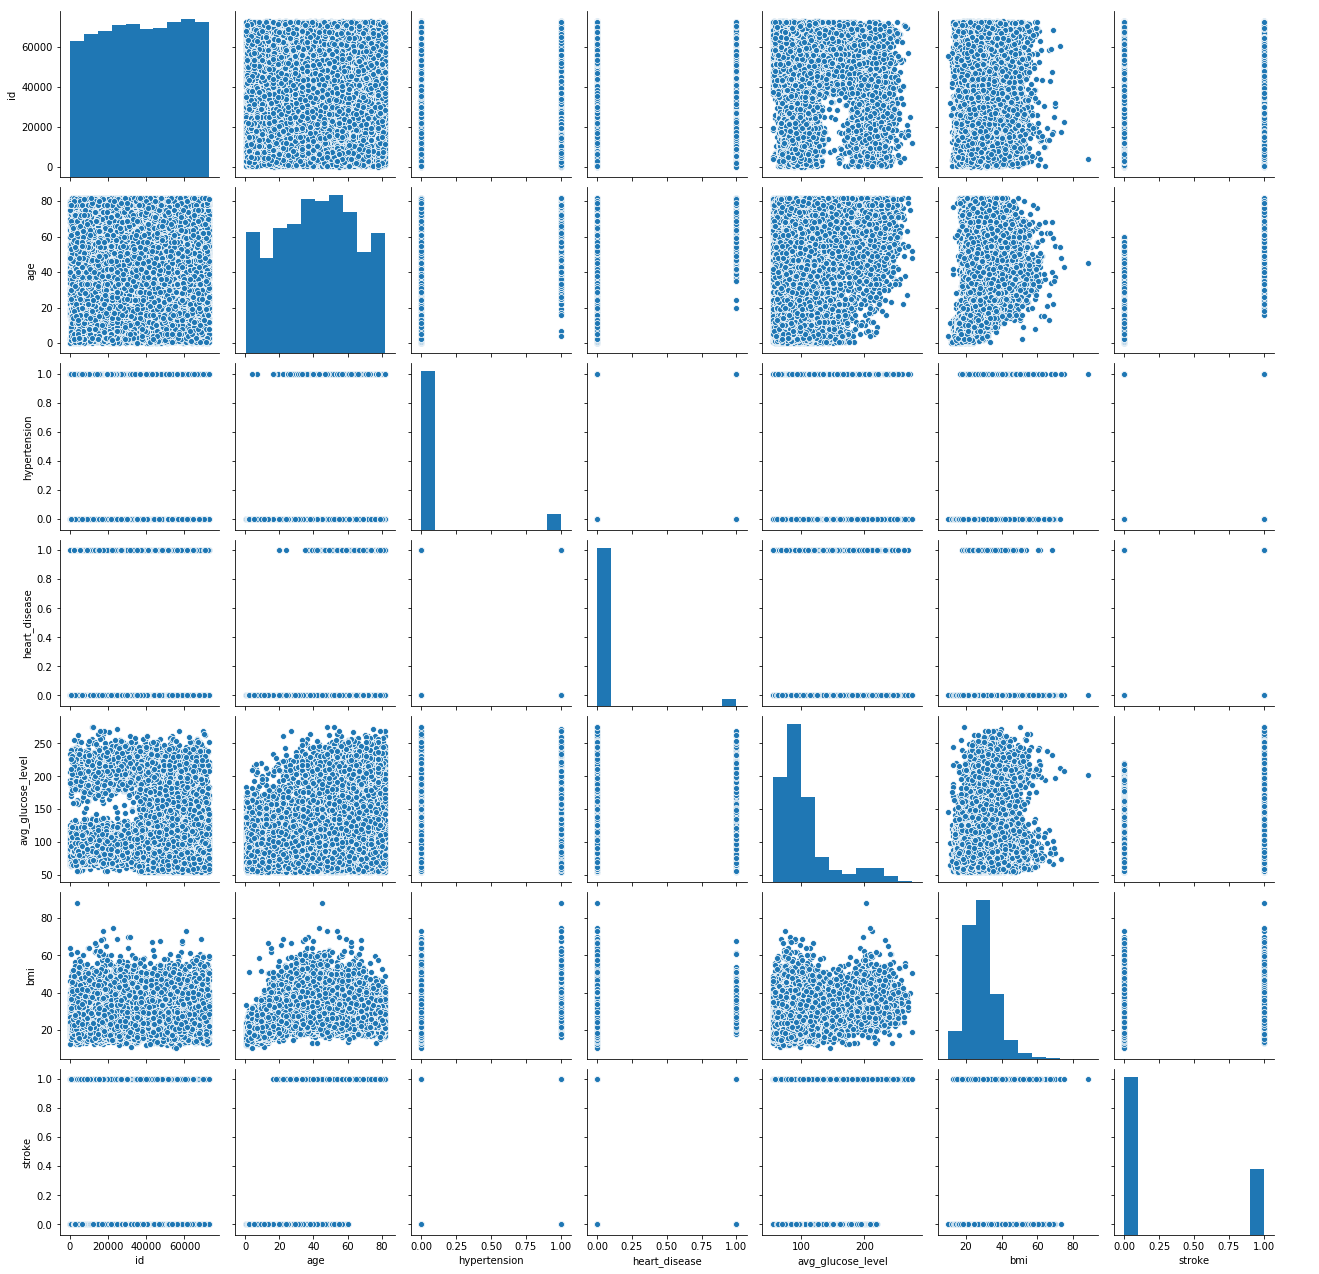

In [41]:
sns.pairplot(df_test)

In [42]:
df_test[df_test['stroke']==1]['gender'].iplot(kind='hist')

In [43]:
df_test['stroke'].value_counts().iplot(kind='bar')

In [44]:
minor = df_test[df_test['age']<=18]
young = df_test[(df_test['age']>=19) & (df_test['age']<=40)]
middle = df_test[(df_test['age']>=41) & (df_test['age']<=60)]
elderly = df_test[df_test['age']>=61]

In [45]:
import plotly.graph_objects as go

labels = ['minor','young','middle','elderly']
values = [(len(minor)/len(df_test['age']))*100,(len(young)/len(df_test['age']))*100,(len(middle)/len(df_test['age']))*100,(len(elderly)/len(df_test['age']))*100]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [46]:
minor_stroke = df_test[(df_test['age']<=18) & (df_test['stroke']==1)]
young_stroke = df_test[(df_test['age']>=19) & (df_test['age']<=40) & (df_test['stroke']==1)]
middle_stroke = df_test[(df_test['age']>=41) & (df_test['age']<=60) & (df_test['stroke']==1)]
elderly_stroke = df_test[(df_test['age']>=61) & (df_test['stroke']==1)]

In [47]:
import plotly.graph_objects as go

labels = ['minor','young','middle','elderly']
values = [(len(minor_stroke)/len(df_test[df_test['stroke']==1]))*100,(len(young_stroke)/len(df_test[df_test['stroke']==1]))*100,(len(middle_stroke)/len(df_test[df_test['stroke']==1]))*100,(len(elderly_stroke)/len(df_test[df_test['stroke']==1]))*100]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()